# Classifying Spectral types

## Introduction

Initially, classifying the spectra using ML was more for fun than for a purpose. But on the light of my other notebook on determining the redshifts using ML, classification of spectal types could help reduce the errors on determining the redshifts using photometry.

The data was obtained using the skyserver from the Sloan Digital Sky Survey (SDSS) using the SQL query. In the SQL query, I specified for no missing values of the redshift or the five bands (u,g,r,i,z). Also the dered values were obtained to account for galactic extinction. For each spectral class (star, galaxy and QSO), 5000 sources were obtained; giving a total of 15000 sources.

# EDA

In [2]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import table
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set()
%matplotlib inline

In [3]:
#loading files
filepath= "/home/veroastro/Documents/spectraTypes/data/"
star = pd.read_csv(filepath+"STAR2_Skyserver_SQL2_12_2022 5_02_48 PM.csv")
QSO = pd.read_csv(filepath+"QSO2Skyserver_SQL2_12_2022 5_03_49 PM.csv")
galaxy = pd.read_csv(filepath+"GALAXY2Skyserver_SQL2_12_2022 5_03_24 PM.csv")
star.head()

,#objID,type,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,specObjID,z,zErr,photoZ,photoErr,zWarning,class,subClass
0,1237648703511068760,3,18.77188,0.018979,17.43419,0.004775,16.93682,0.004398,16.76784,0.004519,16.69084,0.009132,334462399065122816,0.000273,0.000010,0.028731,0.012854,0,STAR,F9
1,1237648703511068760,3,18.77188,0.018979,17.43419,0.004775,16.93682,0.004398,16.76784,0.004519,16.69084,0.009132,334463218732787712,0.000268,0.000012,0.028731,0.012854,0,STAR,F9
2,1237650761850290262,3,20.95792,0.113500,18.33668,0.007373,16.96131,0.004531,16.33501,0.004110,15.97918,0.007425,368266889681463296,0.000002,0.000009,0.205829,0.021877,0,STAR,M0
3,1237648705678147694,3,17.76817,0.012322,16.35608,0.003747,15.82515,0.003405,15.65219,0.003503,15.55778,0.005531,409929854226556928,0.000027,0.000007,0.024064,0.008734,0,STAR,F9
4,1237648705130987618,3,19.09714,0.034568,17.45125,0.006773,17.63474,0.006646,24.28417,3.215709,17.99097,0.034200,604619828854024192,-0.000010,0.000010,-9999.000000,-9999.000000,0,STAR,F9


In [4]:
# Concatenating the three dataframes
data = pd.concat([star, QSO, galaxy])
#scrambling the data so that they are not ordered by class
data = data.sample(frac=1)
data.head()

,#objID,type,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,specObjID,z,zErr,photoZ,photoErr,zWarning,class,subClass
3318,1237656496720838806,3,19.05006,0.035549,18.64025,0.010686,18.38684,0.010548,18.10099,0.011792,17.87401,0.032490,840033243360159744,0.460572,0.000084,0.420240,0.111385,0,QSO,BROADLINE
4559,1237674648851710018,3,17.51268,0.019381,16.33018,0.004315,15.80432,0.003701,15.48149,0.003661,15.24083,0.007232,316394118697740288,0.073120,0.000009,0.050620,0.010247,0,GALAXY,STARFORMING
4985,1237661083199406143,3,16.06708,0.006289,14.82370,0.003543,14.42508,0.003404,14.34694,0.003630,14.51768,0.004555,1875794924713043968,0.000085,0.000010,0.074731,0.105270,0,STAR,F2
4726,1237661055281661187,3,20.98037,0.114074,18.40370,0.009187,17.07613,0.017746,16.44488,0.004784,16.07006,0.007338,1874687991130122240,0.000051,0.000008,0.197431,0.022649,0,STAR,M0
2650,1237657769636135496,3,21.93561,0.348893,20.18889,0.038376,18.78074,0.016038,18.28471,0.016147,17.80798,0.037789,1016724764410013696,0.324437,0.000028,0.308965,0.046537,0,QSO,AGN BROADLINE


In [5]:
data.shape

(15000, 20)

In [6]:
cols= ['zWarning','specObjID','#objID']
data_clean = data.drop(columns=['zWarning','specObjID','#objID'])
data_clean.shape

(15000, 17)

In [7]:
data_clean.head()

,type,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,z,zErr,photoZ,photoErr,class,subClass
3318,3,19.05006,0.035549,18.64025,0.010686,18.38684,0.010548,18.10099,0.011792,17.87401,0.032490,0.460572,0.000084,0.420240,0.111385,QSO,BROADLINE
4559,3,17.51268,0.019381,16.33018,0.004315,15.80432,0.003701,15.48149,0.003661,15.24083,0.007232,0.073120,0.000009,0.050620,0.010247,GALAXY,STARFORMING
4985,3,16.06708,0.006289,14.82370,0.003543,14.42508,0.003404,14.34694,0.003630,14.51768,0.004555,0.000085,0.000010,0.074731,0.105270,STAR,F2
4726,3,20.98037,0.114074,18.40370,0.009187,17.07613,0.017746,16.44488,0.004784,16.07006,0.007338,0.000051,0.000008,0.197431,0.022649,STAR,M0
2650,3,21.93561,0.348893,20.18889,0.038376,18.78074,0.016038,18.28471,0.016147,17.80798,0.037789,0.324437,0.000028,0.308965,0.046537,QSO,AGN BROADLINE


In [8]:
# Encoding the classes to integers
def type_to_value(n):
    if n == 'STAR':
        return 1
    elif n == 'QSO':
        return 2
    elif n == 'GALAXY':
        return 3
    

data_clean['nClass'] = [type_to_value(n) for n in data_clean['class']]

In [9]:
# Removing errors, redshift and class data
data1 = data_clean.drop(['type','err_u', 'err_g', 'err_r', 'err_i', 'err_z','z', 'zErr', 'class', 'subClass','photoZ','photoErr'], axis = 1)
data1.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,nClass
3318,19.05006,18.64025,18.38684,18.10099,17.87401,2
4559,17.51268,16.33018,15.80432,15.48149,15.24083,3
4985,16.06708,14.82370,14.42508,14.34694,14.51768,1
4726,20.98037,18.40370,17.07613,16.44488,16.07006,1
2650,21.93561,20.18889,18.78074,18.28471,17.80798,2


In [128]:
# Description of the cleaned dataset
data1.describe()

,dered_u,dered_g,dered_r,dered_i,dered_z,nClass
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,19.869886,18.452114,17.631055,17.163975,16.934978,2.000000
std,1.702831,1.544044,1.469840,1.371121,1.453392,0.816524
min,11.101360,12.074510,10.785910,10.756660,9.813457,1.000000
25%,18.870685,17.598865,16.818827,16.356315,16.086430,1.000000
50%,19.614630,18.316495,17.479280,17.038925,16.791815,2.000000
75%,20.553992,19.144298,18.450765,18.022543,17.732482,3.000000
max,29.762490,29.461400,28.317300,28.234270,28.220950,3.000000


The dereddened magnitudes (or mean brightness) seem to increase from the u band to the z band, with the highest mean brightness in the z band. And the spread of the data (as indicated by the standard deviation) also varies between bands, with the largest spread in the u band and the smallest spread in the z band.

In [10]:
# Create function to plot the histograms of all columns in the dataset in a subplot
def hist_plots( data: pd.DataFrame,
               rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

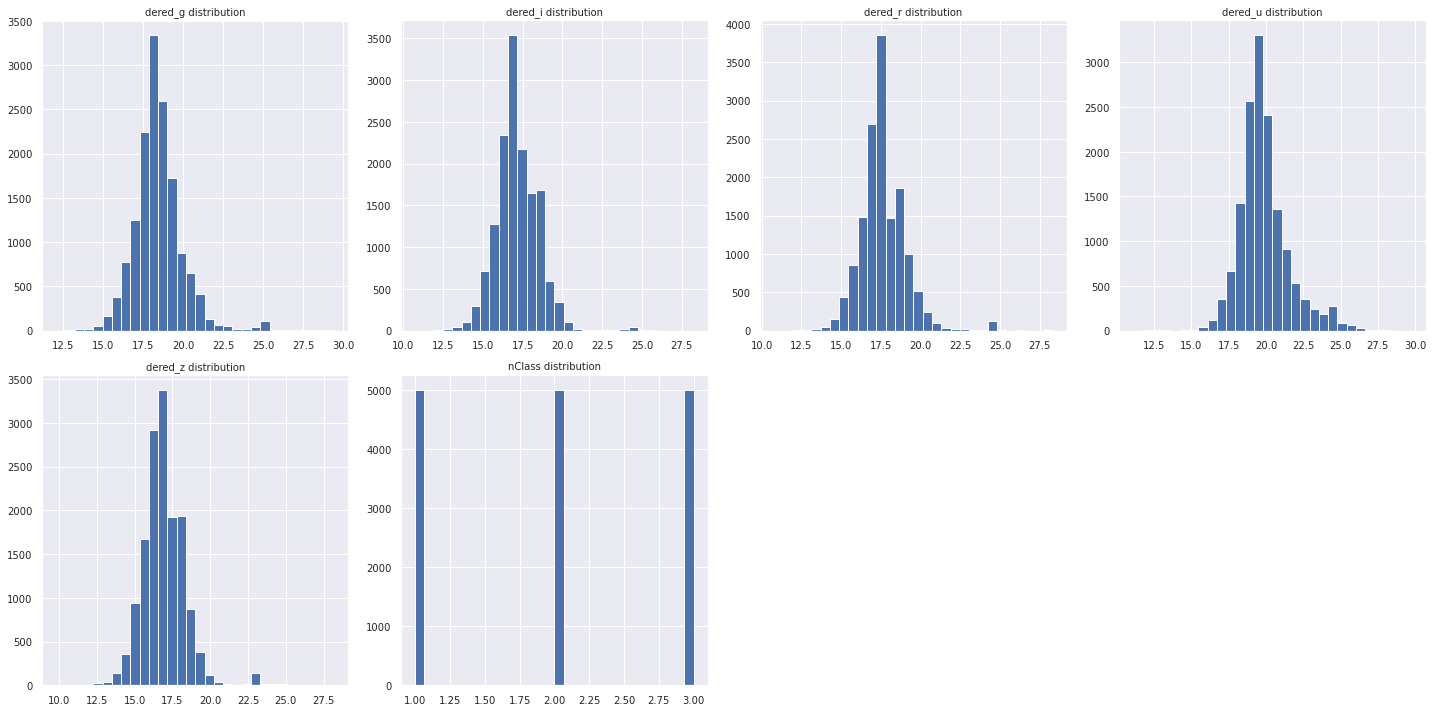

In [11]:
hist_plots(data=data1,
          rows=2,
          cols=4,
          figsize=(20,10))

### Calculating Colours

Colour in astrophysics is defined as the difference between the magnitudes of two passbands (u, g, r, i, z). The most comon colours are between adjacent bands; therefore (u-g),(g-r),(r-i),(i-z). What do the colours tell us? Mainly, they tell us roughly about the shape of the spectrum of the electromagnetic radiation of the source. In the case of stars, it indicates temperature. In the case of galaxies, it can indicate age and shape of the galaxy. The redder the galaxy, the older the population and or more dust. The bluer the galaxy, the younger the population and or less dust. It is also an indication of starformation within the galaxy. 

In [12]:
# Create a function to calculate the colours of the sources
def compute_colour(row):
    u = row['dered_u']
    g = row['dered_g']
    r = row['dered_r']
    i = row['dered_i']
    z = row['dered_z']
    return pd.Series({'u-g': u - g, 'g-r': g - r, 'r-i': r - i, 'i-z': i - z})
# Apply the function compute_colour
colour_ind = data1.apply(compute_colour, axis=1)
# Create new dataframe with the colours added
data_colour = pd.concat([data1,colour_ind], axis=1)
data_colour.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,nClass,u-g,g-r,r-i,i-z
3318,19.05006,18.64025,18.38684,18.10099,17.87401,2,0.40981,0.25341,0.28585,0.22698
4559,17.51268,16.33018,15.80432,15.48149,15.24083,3,1.18250,0.52586,0.32283,0.24066
4985,16.06708,14.82370,14.42508,14.34694,14.51768,1,1.24338,0.39862,0.07814,-0.17074
4726,20.98037,18.40370,17.07613,16.44488,16.07006,1,2.57667,1.32757,0.63125,0.37482
2650,21.93561,20.18889,18.78074,18.28471,17.80798,2,1.74672,1.40815,0.49603,0.47673


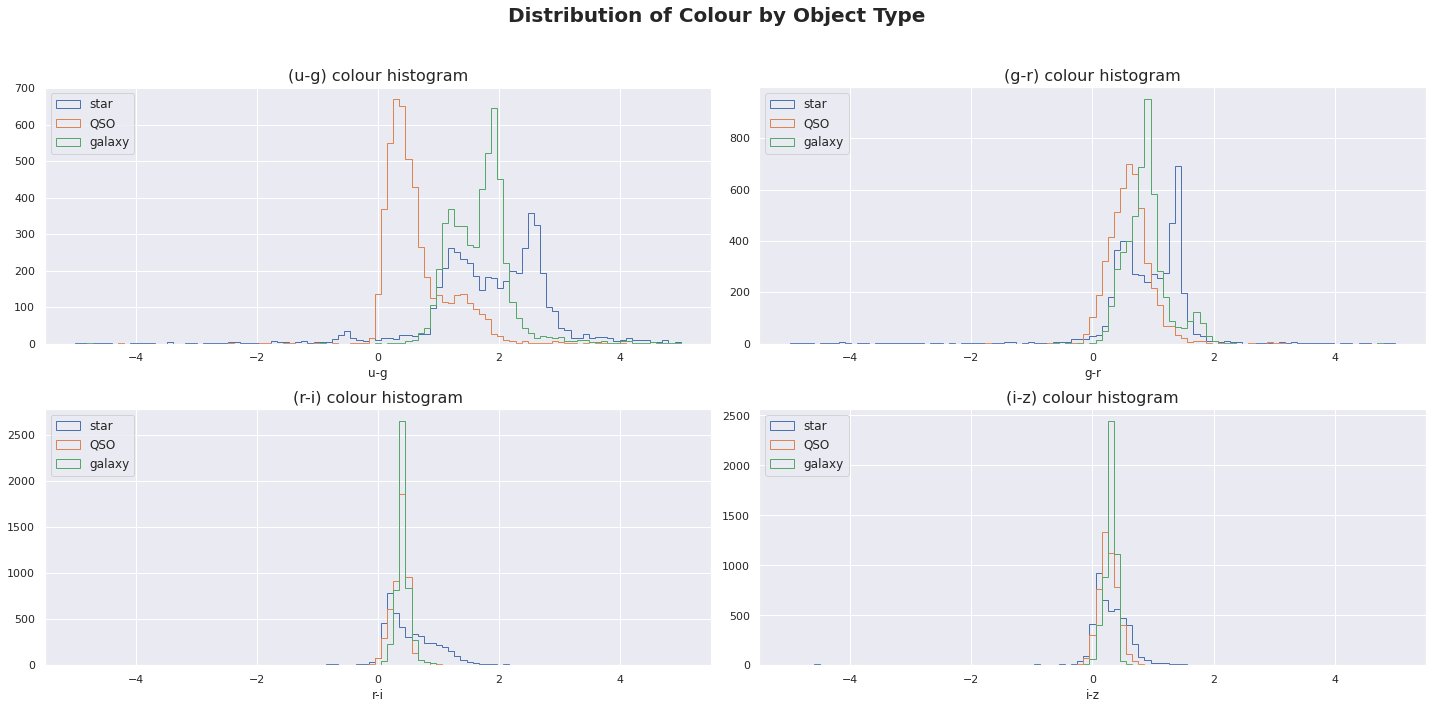

In [132]:
# Create histograms of the colours for each object type in the same plot
# Create boolean series for each of the classes of objects
star = data_colour['nClass']  == 1
QSO = data_colour['nClass']  == 2
galaxy = data_colour['nClass']  == 3
colour = ['u-g','g-r','r-i','i-z']

# Create subplots and plot histograms
bins = np.linspace(-5, 5, 100)
fig,axs = plt.subplots(2,2, figsize=(20,10))
axs = axs.ravel()

for i, n in enumerate(colour):
    ax = axs[i]
    X = data_colour[n]
    #create the histograms for the object type per colour
    ax.hist(X[star], bins,histtype='step', label='star')
    ax.hist(X[QSO], bins,histtype='step', label='QSO')
    ax.hist(X[galaxy], bins,histtype='step', label='galaxy')
    #set legend, lables and title
    ax.legend(loc='upper left',fontsize=12)
    ax.set_xlabel(n)
    ax.set_title(f'({n}) colour histogram', fontsize=16)
    
fig.suptitle('Distribution of Colour by Object Type', fontsize=20, fontweight="bold")
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

For stars, in the (u-g) and (g-r) distributions, we can see bimodality which indicates the temperature of the star whether is a hot blue star (to the left of the distribution) or a cold red star(to the right). The distributions of (r-i) and (i-z) show this bimodality less and in fact, the distributions are more congruent with a positive skewed distribution. As the colours move more to the infrared side of the bands' spectrum, they are less sensitive to the temperature and more sensitive to interstellar dust, metalicity and age.

For QSOs, the (u-g) distribution peak is much bluer than that of stars and galaxies.  It is as expected since what we see in QSOs are the active galactic nuclei(AGN, supermassive black holes)  that outshine the stars of their host galaxies. The radiation peaks at the blue end of the spectrum.  There is a small second population that is redder (to the left) than the rest of the population and this can be due to the fact that there is a combination of radiation from the AGN and the host galaxies. In the (g-r), we are seeing more of the radiation of the host galaxies but the distribution is still bluer than the galaxy distribution. In the distributions of (r-i) and (i-z), the galaxy and QSOs distributions are indistinguishable. Here, we are seeing the host galaxy radiation. 

For galaxies, there is a bimodal distribution in the (u-g) and (g-r). What we are seeing here is two populations; one population of young blue galaxies and the other of old red galaxies. On the other hand, the distributions of (r-i) and (i-z) show a very narrow distribution with a high peak. This could be due to the fact that we are sampling interstellar dust. Dust can absorb or scatter the light emitted by stars in a galaxy which makes the galaxy appear redder than it actually is. These distributions can be affected by the limited wavelength coverage of the bands.


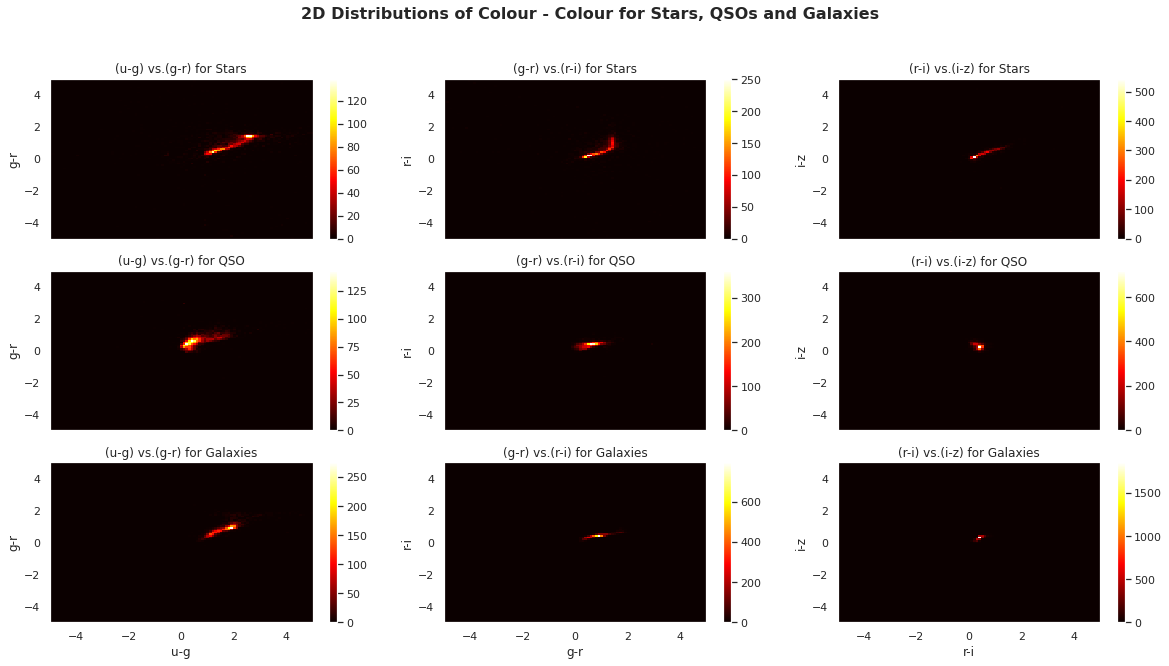

In [129]:
# Create 2D distributions for each colour vs colour for each object type
fig, axs = plt.subplots(3, 3, figsize=(20, 10), sharex='col')

bins = np.linspace(-5, 5, 100)

classes = [star, QSO, galaxy]
objects = ['Stars', 'QSO', 'Galaxies']

for i in range(len(colour)-1):
    for j, n in enumerate(classes):
        
        h = axs[j, i].hist2d(data_colour[colour[i]][n], data_colour[colour[i + 1]][n], bins, cmap='hot')
        
        # Set labels for each subplot
        axs[j, i].set_title(f'({colour[i]}) vs.' f'({colour[i+1]}) for ' f'{objects[j]}')
        axs[j, i].set_ylabel(colour[i + 1])
        if j>= 2 :
                axs[j,i].set_xlabel(colour[i])
        
        # Add colorbars to each subplot
        fig.colorbar(h[3], ax=axs[j, i])    
            

fig.suptitle('2D Distributions of Colour - Colour for Stars, QSOs and Galaxies', fontsize=16, fontweight="bold")
#plt.savefig('/home/veroastro/Documents/spectraTypes/images/2dH_colour.pdf')
# Show the plot
plt.show()

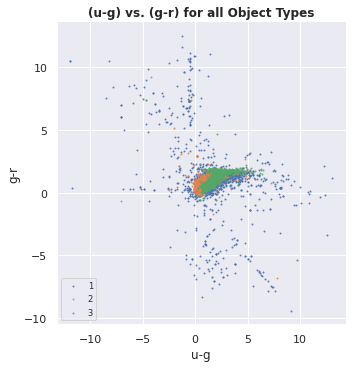

In [130]:
#Scatter plot hued by classes
sns.lmplot( x="u-g", y="g-r", data= data_colour, fit_reg=False, hue='nClass', legend=False, scatter_kws={"s": 1})
# Add title and legend
plt.title('(u-g) vs. (g-r) for all Object Types', fontweight="bold")
plt.legend(fontsize='small', loc='lower left')
#plt.savefig('/home/veroastro/Documents/spectraTypes/images/scatter_classes.pdf')
plt.show()

# Calculating the object types

In [142]:
# Separating the features and the labled data and normalising the data
from sklearn.preprocessing import MinMaxScaler
cols= data1.columns[:-1]
X = data1[cols]
y = data1['nClass']
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_t, columns = ['dered_u','dered_g','dered_r','dered_i','dered_z'])

In [12]:
# split the data in train and test subsets
from sklearn.model_selection import StratifiedShuffleSplit


# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=3, 
                                          test_size=0.3, 
                                          random_state=42)



train_idx, test_idx = next(strat_shuf_split.split(X_t,y))
print(train_idx.shape)
print(test_idx.shape)

X_train = X_scaled[cols].iloc[train_idx]
y_train = data1['nClass'].iloc[train_idx]
X_test  = X_scaled[cols].iloc[test_idx]
y_test  = data1['nClass'].iloc[test_idx]

X_train.head()
#X.head()


(10500,)
(4500,)


,dered_u,dered_g,dered_r,dered_i,dered_z
6244,0.418620,0.277967,0.286992,0.261855,0.279390
8037,0.616498,0.472872,0.443517,0.411021,0.420628
11432,0.591391,0.469455,0.442092,0.410695,0.422589
3326,0.459214,0.407653,0.440674,0.420174,0.445306
5107,0.480978,0.370256,0.390199,0.369057,0.380852


In [13]:
# Apply the compute_colour function to your DataFrame
colour_indices = X.apply(compute_colour, axis=1)

X_colour = pd.concat([X,colour_indices], axis=1)
X_colour.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,u-g,g-r,r-i,i-z
2630,19.13248,18.82902,18.44817,18.02750,18.09456,0.30346,0.38085,0.42067,-0.06706
692,20.84923,19.75584,18.89735,18.53416,18.03991,1.09339,0.85849,0.36319,0.49425
4453,17.83060,16.35676,15.80797,15.62026,15.59619,1.47384,0.54879,0.18771,0.02407
3769,21.34056,18.43666,17.03625,15.67398,14.92618,2.90390,1.40041,1.36227,0.74780
3982,19.70097,17.78839,17.04071,16.72902,16.55683,1.91258,0.74768,0.31169,0.17219


In [14]:
#creating a feature dataset with colours (diference between bands)
X_train_c = X_colour.iloc[train_idx]
X_test_c  = X_colour.iloc[test_idx]


In [15]:
# using logistic regression on the non-colour data

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {"C":np.logspace(-3,3,30), "penalty":["l1","l2"]}


grid = GridSearchCV(LogisticRegression(solver='liblinear'), params)


GR = grid.fit(X_train, y_train)

In [16]:
GR.best_params_ ,GR.best_score_

({'C': 621.0169418915616, 'penalty': 'l1'}, 0.6180952380952381)

In [17]:
y_pred=grid.predict(X_test)
#y_prob=grid.predict_proba(X_test)

In [18]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)


              precision    recall  f1-score   support

           1       0.57      0.50      0.53      1500
           2       0.70      0.82      0.76      1500
           3       0.56      0.53      0.54      1500

    accuracy                           0.62      4500
   macro avg       0.61      0.62      0.61      4500
weighted avg       0.61      0.62      0.61      4500



Trying adding colours to the dataframe  and redo the algorithm

In [19]:
# test with colours
GR = grid.fit(X_train_c, y_train)
GR.best_params_ ,GR.best_score_

/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Conv

({'C': 0.3039195382313198, 'penalty': 'l2'}, 0.6203809523809524)

In [20]:
y_pred_c=grid.predict(X_test_c)

In [21]:
cr_c = classification_report(y_test, y_pred_c)
print(cr_c)

              precision    recall  f1-score   support

           1       0.56      0.52      0.54      1500
           2       0.69      0.82      0.75      1500
           3       0.56      0.50      0.53      1500

    accuracy                           0.61      4500
   macro avg       0.61      0.61      0.61      4500
weighted avg       0.61      0.61      0.61      4500



 Colour doesn't affect the estimation of the spectral classes

## Testing other classifiers
   ### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':range(1,400, 40)}


RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)
rf = GridSearchCV(RF,
                  param_grid=param_grid)

rf = rf.fit(X_train, y_train)

/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserW

In [23]:
rf.best_params_ ,rf.best_score_

({'n_estimators': 361}, 0.8884761904761904)

In [24]:
y_pred_rf = rf.predict(X_test)
cr = classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           1       0.92      0.91      0.91      1500
           2       0.94      0.89      0.91      1500
           3       0.86      0.92      0.89      1500

    accuracy                           0.90      4500
   macro avg       0.91      0.90      0.91      4500
weighted avg       0.91      0.90      0.91      4500



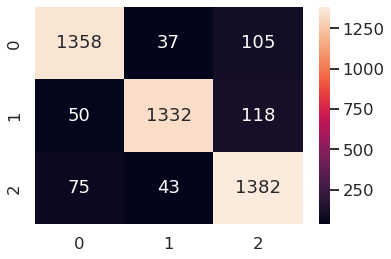

In [25]:
from sklearn.metrics import confusion_matrix
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cm, annot=True, fmt='d')

### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier


param_grid = {'max_depth':range(1, 1000, 40),
              'max_features': [ 'auto', 'sqrt', 'log2']}

GR_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR_dt = GR_dt.fit(X_train, y_train)

In [27]:
#GR_dt.tree_.node_count, GR_dt.tree_.max_depth
GR_dt.best_params_ ,GR_dt.best_score_

({'max_depth': 41, 'max_features': 'auto'}, 0.8257142857142858)

In [28]:

y_pred_dt = GR_dt.predict(X_test)
cr_dt = classification_report(y_test, y_pred_dt)
print(cr_dt)


              precision    recall  f1-score   support

           1       0.85      0.84      0.84      1500
           2       0.87      0.86      0.86      1500
           3       0.81      0.82      0.82      1500

    accuracy                           0.84      4500
   macro avg       0.84      0.84      0.84      4500
weighted avg       0.84      0.84      0.84      4500



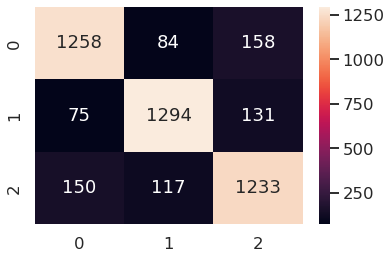

In [29]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_dt)
ax = sns.heatmap(cm, annot=True, fmt='d')

### Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

tree_list = [15, 25, 50, 100, 200, 400]
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

y_pred_gbc = GV_GBC.predict(X_test)
print(classification_report(y_pred_gbc, y_test))

              precision    recall  f1-score   support

           1       0.86      0.89      0.88      1453
           2       0.86      0.91      0.88      1410
           3       0.89      0.81      0.85      1637

    accuracy                           0.87      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       0.87      0.87      0.87      4500



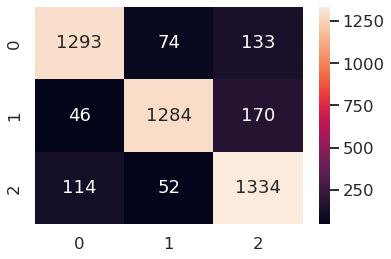

In [31]:

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_gbc)
ax = sns.heatmap(cm, annot=True, fmt='d')

# Conclusion

I obtained 90% accuracy with Random Forest Classifier and over 82% on the other classifiers except Logistic Regression (62%) which was a litle over random in some cases. Colours, as expected from the image (ug vs gr), didn't add any new information to the models. 

This is less than obtained on the Determining Redshift notebook and not good enough to imporove estimation of redshifts.